# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [2]:
import math
import sys

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [4]:
iris = pd.read_csv("iris.tsv", sep="\t")
iris.sample(10).head(10)

,sepal-length,sepal-width,petal-length,petal-width,target
81,6.6,3.0,4.4,1.4,1
147,5.1,3.4,1.5,0.2,0
122,5.8,2.7,5.1,1.9,2
21,5.6,3.0,4.1,1.3,1
133,4.6,3.2,1.4,0.2,0
77,6.5,3.0,5.5,1.8,2
114,5.6,3.0,4.5,1.5,1
19,5.8,2.7,5.1,1.9,2
22,6.9,3.1,4.9,1.5,1
63,7.4,2.8,6.1,1.9,2


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [5]:
iris_columns = iris.columns.to_list()
iris_columns

['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target']

This dataset contains measurements of three iris flowers along their petals and sepals. Each row is one flower, with 50 flowers in each classification. The target is a classification of species of iris. It is unclear if each row is an average of the 3 sepals and 3 petals, or if one was randomly sampled from each flower. 

`sepal-length`: (float) Length of the sepal in cm. In the iris family, the sepal is one of 3 large, colorful petals that reach downward, also known as the "falls".

`sepal-width`: (float) Width of the sepal in cm.

`petal-length`: (float) Length of the petal in cm. In this case, the petal is referring to the 3 smaller, upright petals, also called the "standards".

`petal-width`: (float) Width of the petal in cm.

`target`: (integer) The species of the iris flower. The numbers are:

0. Iris Setosa
1. Iris Versicolour
2. Iris Virginica

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

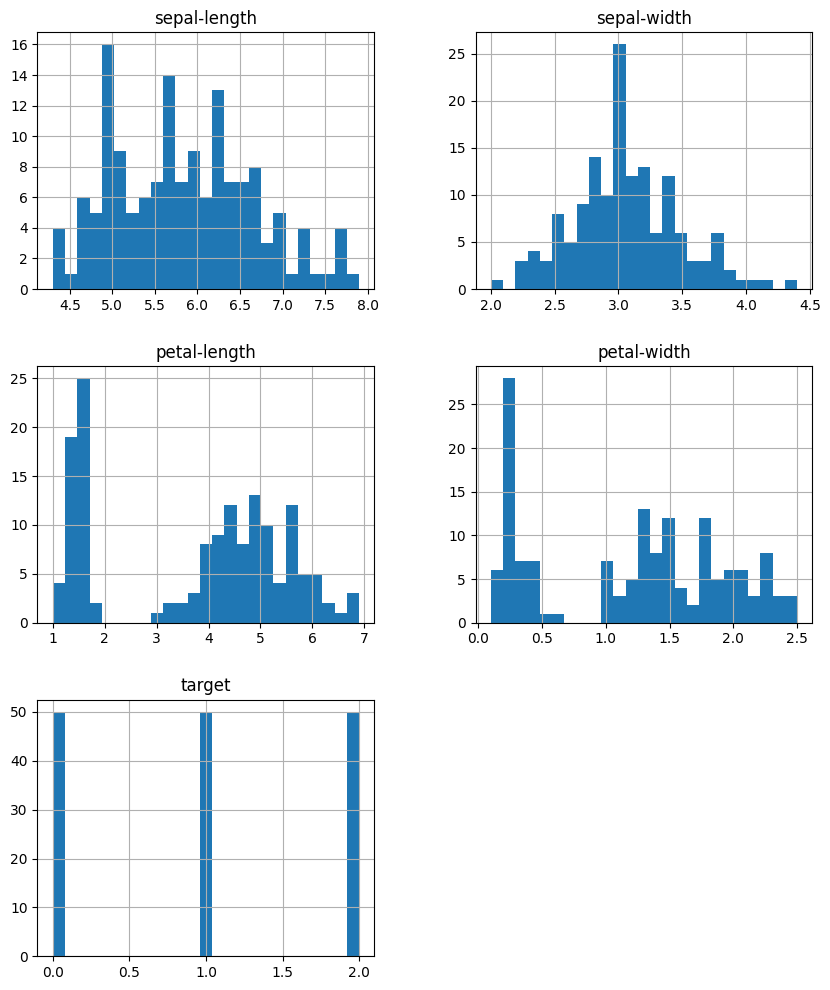

In [6]:
iris.hist(bins=25, figsize=(10, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

Plotted with no categories, the non-target columns generally don't look uniform. You could argue that `sepal-width` is roughly normal, and `sepal-length` is roughly normal with a left skew. The target column is perfectly uniform with equal class sizes. 

Lets try these with categories showing.

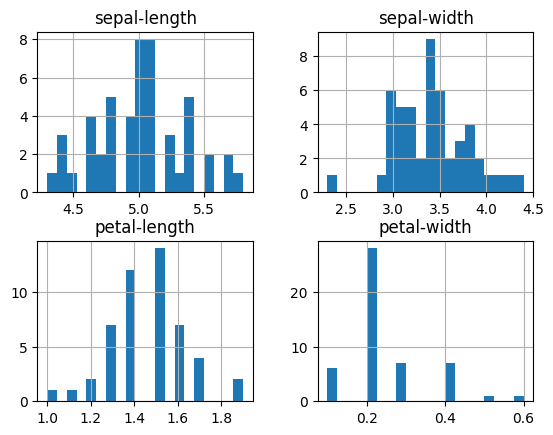

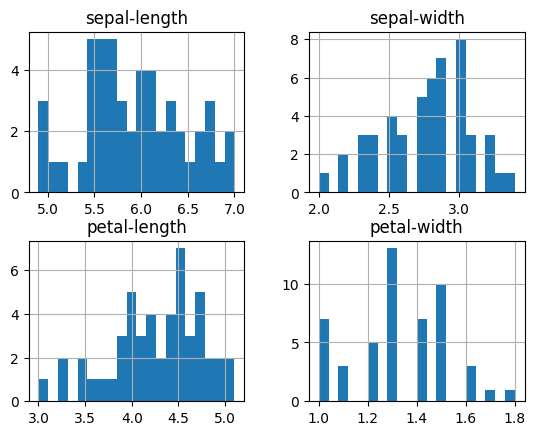

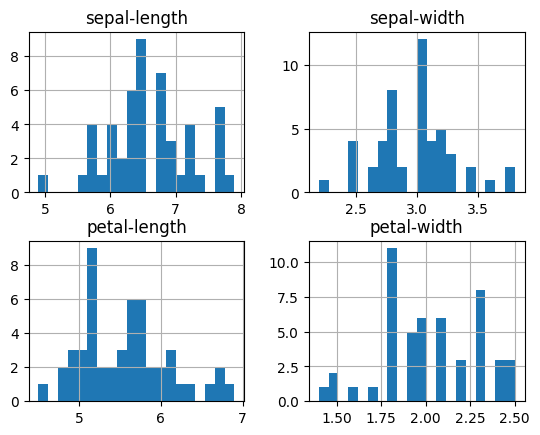

In [7]:
grouped = iris.groupby("target").hist(column=iris_columns[:-1], bins=20)

These don't look much better. My hope was that isolating to species we could see a more normal distribution. Due to low sample sizes, it's hard to say for certain. 

All non-target columns seem to be approaching a normal distribution.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

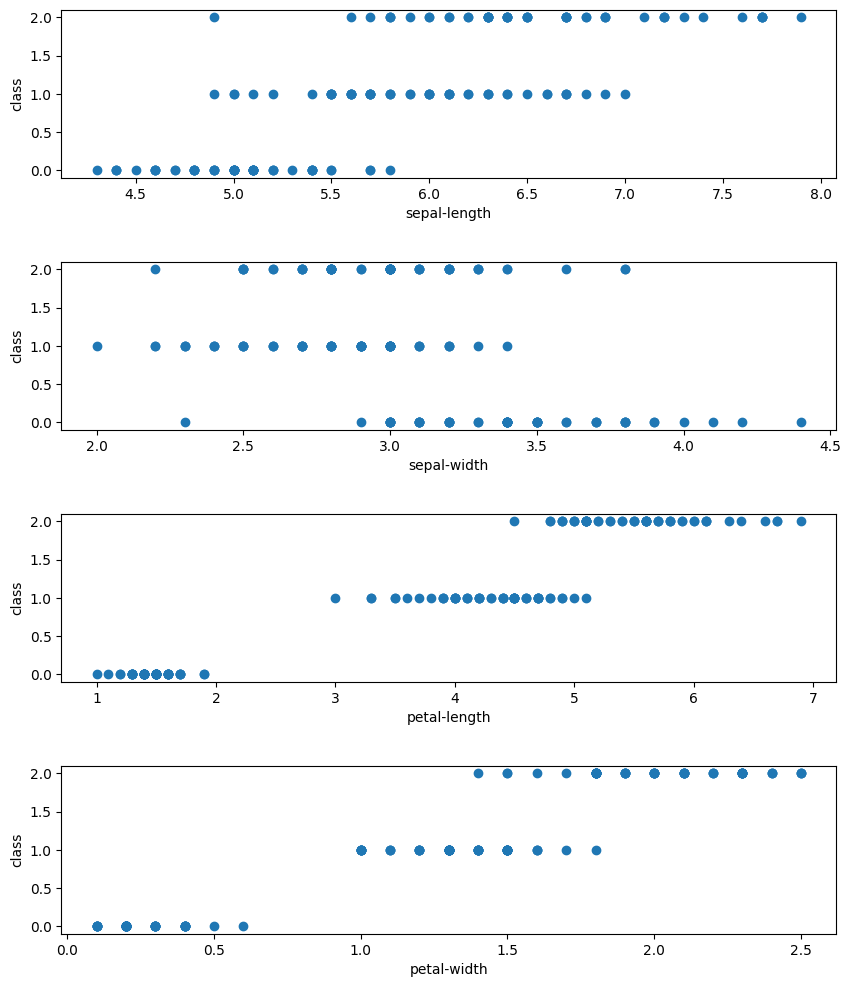

In [8]:
iris_inputs = iris.drop(columns="target")
iris_target = iris["target"]

index = 1
for name, col in iris_inputs.items():
    plt.subplot(4, 1, index).figure.set_size_inches(10, 12)
    index += 1

    plt.scatter(col, iris_target)
    plt.xlabel(name)
    plt.ylabel("class")

plt.subplots_adjust(hspace=0.5)
plt.show()


Just from using common sense, the species of a flower and its size are dependent in that species only have the genetic disposition to develop features of a certain size. A human cannot be the size of an elephant, nor can an elephant be the size of a human. Whether the size can be a determinant between similarly sized iris species is a different question. From the `sepal-length`, `petal-length`, and `petal-width` columns it seems that _Iris Setosa_ has the smallest median features, while _Iris Virginica_ has the highest median. This trend departs in the `sepal-width` column, which seems to almost invert this relationship. Just from looking at the data, the columns seem to show dependence between the inputs and the output using clear size ranges to describe species differences.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean squared error: 0.046385088311226945


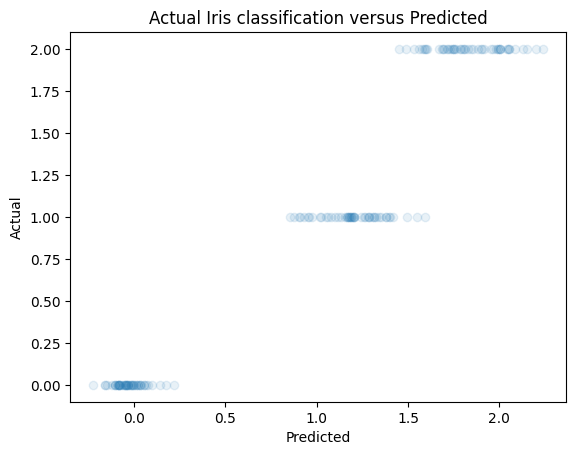

In [9]:
least_squares_model = sklearn.linear_model.LinearRegression()
least_squares_model.fit(iris_inputs, iris_target)
pred = least_squares_model.predict(iris_inputs)
print("Mean squared error:", sklearn.metrics.mean_squared_error(iris_target, pred))
plt.scatter(pred, iris_target, alpha=0.1)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual Iris classification versus Predicted")
plt.show()

Mean squared error: 0.046

The linear model computed floating point values for the predicted class which gives us this range for each actual classification. Technically, the classification isn't done until we determine a rounding rule or linear discriminant in the predicted output. Because classes 1 and 2 overlap in their predicted regions, some error in the final rounded output will be introduced. In this case, it seems like class 0 is cleanly separable and classifiable, while classes 1 and 2 lean towards each other and overlap.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


MSE: sepal-length 0.2583986123119253
MSE: sepal-width 0.5493765900582832
MSE: petal-length 0.06621216537347084
MSE: petal-width 0.05678463583919234


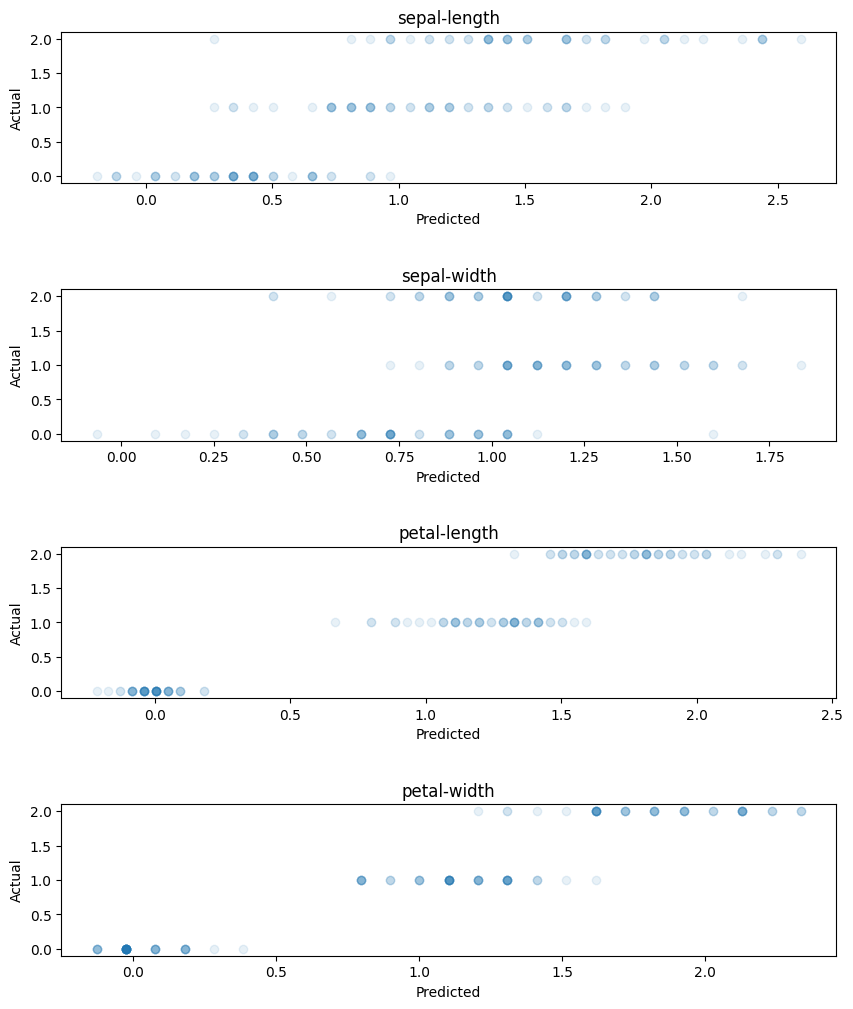

In [10]:
index = 1
for name in iris_inputs.columns:
    model = sklearn.linear_model.LinearRegression()
    model.fit(iris_inputs[[name]], iris_target)
    pred = model.predict(iris_inputs[[name]])
    print("MSE:", name, sklearn.metrics.mean_squared_error(iris_target, pred))

    plt.subplot(4, 1, index).figure.set_size_inches(10, 12)
    index += 1

    plt.scatter(pred, iris_target, alpha=0.1)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(name)

plt.subplots_adjust(hspace=0.7)
plt.show()

Of the column inputs, the best linear model and the one with the lowest mean squared error is `petal-width` with 0.057, with `petal-length` not far behind at 0.066. These two also look significantly tighter class-wise when plotted. The model using all the inputs (MSE: 0.046) did a better job classifying than the best single column.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

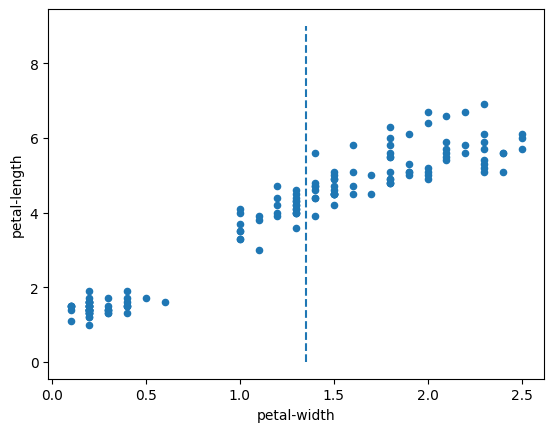

In [11]:
iris.plot.scatter(x="petal-width", y="petal-length")
plt.plot([1.35] * 10, range(10), "--")

The `petal-length` and `petal-width` columns have a pretty clear dependency, which is visible as a linear trend up and to the right. Choosing a vertical split at `petal-width` = 1.35 will roughly split the dataset in half and let us see its effect on `petal-length`.

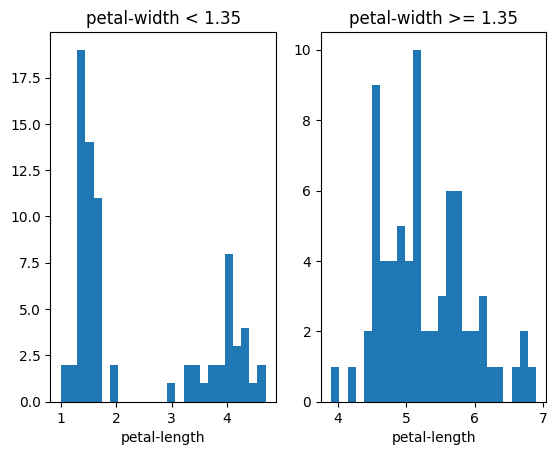

In [12]:
threshold = 1.35
iris_below = iris.query(f"`petal-width` < {threshold}")
iris_above = iris.query(f"`petal-width` >= {threshold}")

plt.subplot(1, 2, 1)
plt.hist(iris_below["petal-length"], bins=25)
plt.xlabel("petal-length")
plt.title(f"petal-width < {threshold}")

plt.subplot(1, 2, 2)
plt.hist(iris_above["petal-length"], bins=25)
plt.xlabel("petal-length")
plt.title(f"petal-width >= {threshold}")

plt.show()


### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

PCA ratios: [0.92461621 0.05301557 0.01718514 0.00518309]. First 2 components: 0.9776317750248034


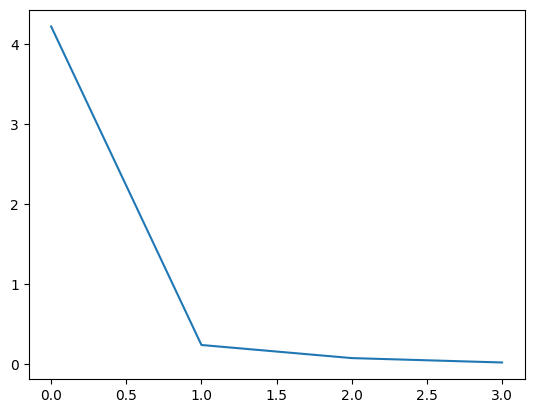

In [13]:
iris_pca = PCA()
iris_pca.fit(iris_inputs, iris_target)
plt.plot(iris_pca.explained_variance_)
print(f"PCA ratios: {iris_pca.explained_variance_ratio_}. First 2 components: {sum(iris_pca.explained_variance_ratio_[0:2])}")

The first two principal components explain about 98% of the variation.

In [14]:
iris_pca_components = pd.DataFrame(iris_pca.components_, columns=[c for c in iris_inputs.columns])
iris_pca_components

,sepal-length,sepal-width,petal-length,petal-width
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


In [15]:
iris_projected = iris_inputs @ iris_pca_components.iloc[:2].T
iris_projected

,0,1
0,7.455360,5.502139
1,6.809673,4.553710
2,6.768968,5.135587
3,9.000108,6.486268
4,7.898908,5.777243
...,...,...
145,3.105829,5.510641
146,3.231446,6.062506
147,2.921020,5.550783
148,2.782750,5.648648


MSE: PCA 2 components 0.060712536286298274


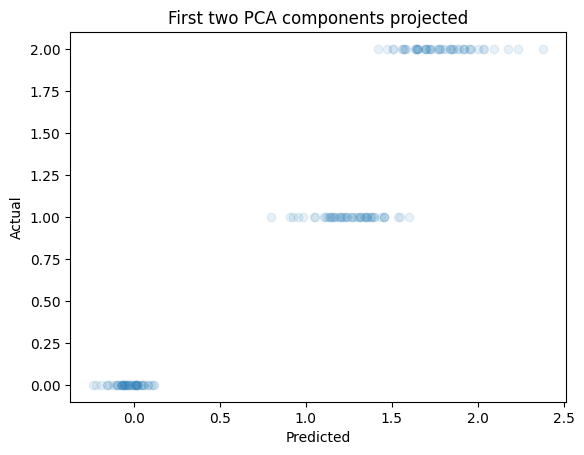

In [16]:
iris_projected_model = sklearn.linear_model.LinearRegression()
iris_projected_model.fit(iris_projected, iris_target)
pred = iris_projected_model.predict(iris_projected)
print("MSE:", "PCA 2 components", sklearn.metrics.mean_squared_error(iris_target, pred))

plt.scatter(pred, iris_target, alpha=0.1)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("First two PCA components projected")
plt.show()

The model using the first two principal components projected has a mean squared error of 0.061, which is worse than the linear model using all the inputs (0.046) but slightly better than the model only using `petal-length` (0.066). 

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [17]:
iris_pca_components

,sepal-length,sepal-width,petal-length,petal-width
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


In [18]:
iris_inputs.corr()

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


`petal-length` and `petal-width` are the columns with the highest Pearson correlation at 0.962, which is a very strong positive correlation. This seems to make sense if we assume that a flower's petals grow proportionally, and not just in one direction like the sepals. This connection is reflected in the first two principle components which describe the vast majority of the variation in the dataset. For example, component 0 uses `petal-length` as the dominant feature (0.857) while `petal-width` adds a large contribution (0.359). In component 1, both features are anticorrelated (negative) and have little contribution. 

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

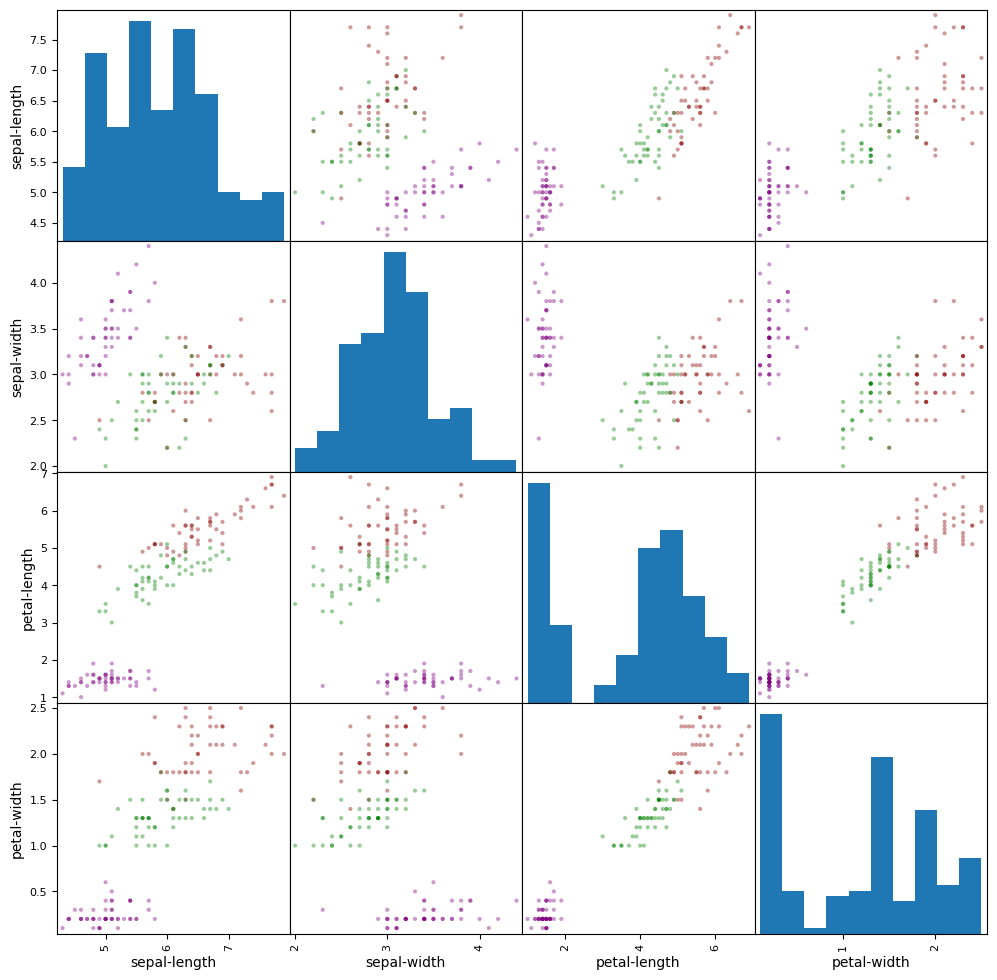

In [19]:
# iris.query("target == 0").plot.scatter("petal-length", "petal-width", alpha=0.3)
iris_cmap = {0: "purple", 1: "green", 2: "darkred"}
pd.plotting.scatter_matrix(iris_inputs, alpha=0.4, figsize=(12,12), color=iris_target.map(iris_cmap))
None

To find outliers, I looked at the scatter matrix with classes colored to find any points that were visibly distant from the rest of its class. I decided to focus in on one row of class 0 (purple, Iris Setosa) that had a `sepal-width` of ~2.3 and was visibly separate on multiple plots. 

In [20]:
iris_setosa = iris.query("target == 0").drop(columns="target")
iris_setosa.query("`sepal-width` < 2.5")

,sepal-length,sepal-width,petal-length,petal-width
57,4.5,2.3,1.3,0.3


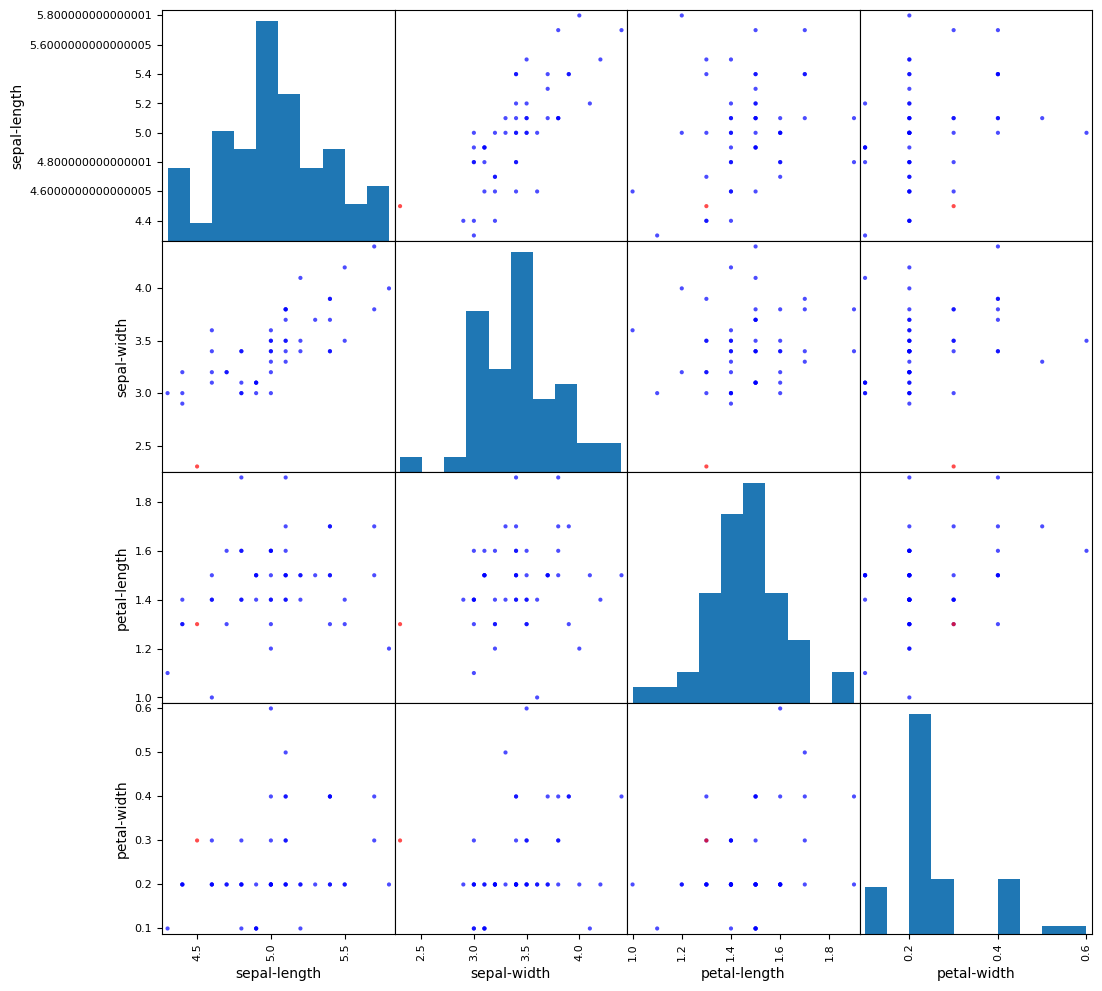

In [21]:
outlier_cmap = iris_setosa.index.map(lambda x: "red" if x==57 else "blue")
pd.plotting.scatter_matrix(iris_setosa, alpha=0.7, figsize=(12,12), color=outlier_cmap)
None

Unfortunately, this outlier in row 57 is only particularly obvious in plots that include the `sepal-width`. 

Model with outlier -- MSE: 0.054  R-squared: 0.558
Model no outlier -- MSE: 0.053  R-squared: 0.553


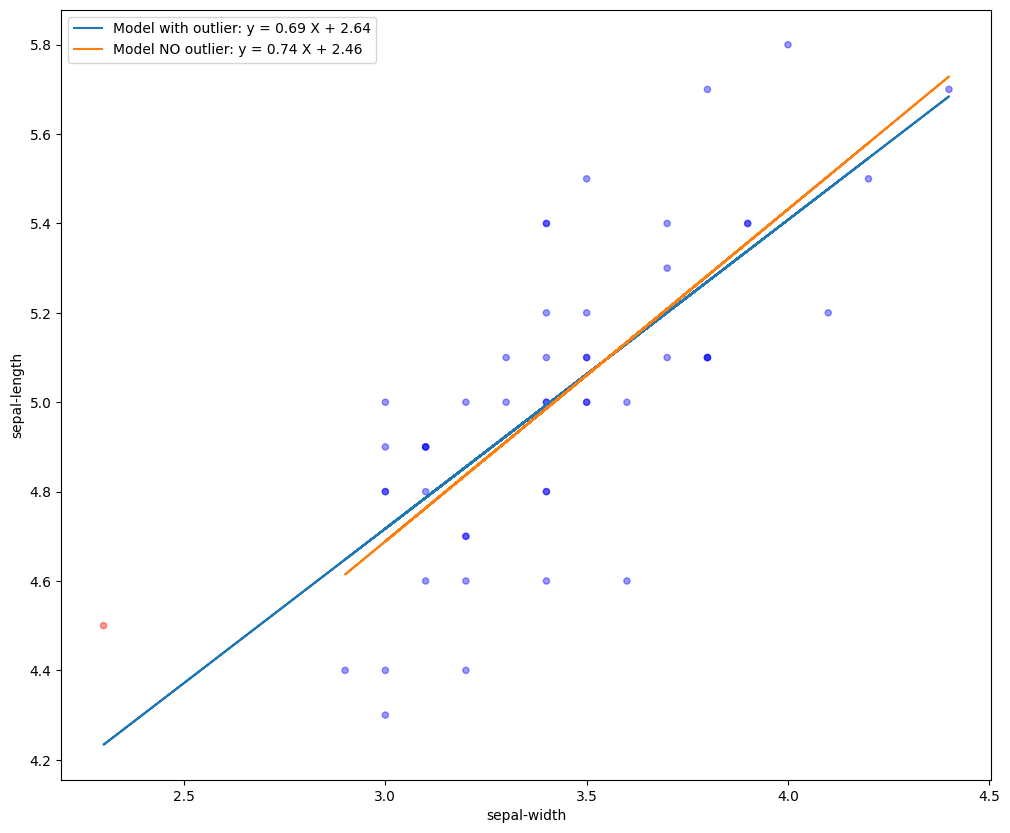

In [31]:
# x = np.linspace(2.2, 4.5, 100).reshape(-1, 1)
X1 = iris_setosa[["sepal-width"]]
y1 = iris_setosa["sepal-length"]
outlier_model = LinearRegression()
outlier_model.fit(X1, y1)
outlier_pred = outlier_model.predict(X1)

iris_setosa_no_outlier = iris_setosa.drop(index=57)
X2 = iris_setosa_no_outlier[["sepal-width"]]
y2 = iris_setosa_no_outlier["sepal-length"]
no_outlier_model = LinearRegression()
no_outlier_model.fit(X2, y2)
no_outlier_pred = no_outlier_model.predict(X2)

iris_setosa.plot.scatter(x="sepal-width", y="sepal-length", alpha=0.4, color=outlier_cmap).figure.set_size_inches(12, 10)

plt.plot(X1, outlier_pred, label=f"Model with outlier: y = {outlier_model.coef_[0]:.2f} X + {outlier_model.intercept_:.2f}")
plt.plot(X2, no_outlier_pred, label=f"Model NO outlier: y = {no_outlier_model.coef_[0]:.2f} X + {no_outlier_model.intercept_:.2f}")
plt.legend()

print(f"Model with outlier -- MSE: {mean_squared_error(y1, outlier_pred):.3f}  R-squared: {r2_score(y1, outlier_pred):.3f}")
print(f"Model no outlier -- MSE: {mean_squared_error(y2, no_outlier_pred):.3f}  R-squared: {r2_score(y2, no_outlier_pred):.3f}")

My hypothesis was that a single point separated from the pack off of one of the ends of the regression would make the largest impact on the MSE and the R2 score. However, removing the outlier didn't change the MSE and R2 scores much at all.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

NONE